In [1]:
import torch


In [2]:
torch.cuda.is_available()

True

In [3]:
%cd '/content/drive/MyDrive/Yolo'

/content/drive/MyDrive/Yolo


In [4]:
!unzip '/content/drive/MyDrive/Yolo/custom_data/obj.zip' -d '/content/drive/MyDrive/Yolo/custom_data'

Archive:  /content/drive/MyDrive/Yolo/custom_data/obj.zip
  inflating: /content/drive/MyDrive/Yolo/custom_data/obj/0-with-mask.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom_data/obj/0-with-mask.txt  
  inflating: /content/drive/MyDrive/Yolo/custom_data/obj/0.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom_data/obj/0.txt  
  inflating: /content/drive/MyDrive/Yolo/custom_data/obj/1-with-mask.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom_data/obj/1-with-mask.txt  
  inflating: /content/drive/MyDrive/Yolo/custom_data/obj/10-with-mask.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom_data/obj/10-with-mask.txt  
  inflating: /content/drive/MyDrive/Yolo/custom_data/obj/100-with-mask.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom_data/obj/100-with-mask.txt  
  inflating: /content/drive/MyDrive/Yolo/custom_data/obj/101-with-mask.jpg  
  inflating: /content/drive/MyDrive/Yolo/custom_data/obj/101-with-mask.txt  
  inflating: /content/drive/MyDrive/Yolo/custom_data

In [5]:
%cd '/content/drive/MyDrive/Yolo'

/content/drive/MyDrive/Yolo


In [6]:
!git clone 'https://github.com/AlexeyAB/darknet.git'

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.70 MiB | 5.26 MiB/s, done.
Resolving deltas: 100% (10400/10400), done.
Checking out files: 100% (2044/2044), done.


In [7]:
%cd '/content/drive/MyDrive/Yolo/darknet'
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/drive/MyDrive/Yolo/darknet


In [8]:
!make 

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [16]:
%cd '/content/drive/MyDrive/Yolo'

/content/drive/MyDrive/Yolo


In [18]:
!python custom_data/creating-files-data-and-name.py

In [13]:
!python custom_data/creating-train-and-test-txt-files.py

In [19]:
%cd '/content/drive/MyDrive/Yolo/custom_data'

/content/drive/MyDrive/Yolo/custom_data


In [20]:
!ls

 0.jpg				       'masked (1605).txt'
 0.txt				       'masked (1606).jpg'
 0-with-mask.jpg		       'masked (1606).txt'
 0-with-mask.txt		       'masked (1607).jpg'
 100-with-mask.jpg		       'masked (1607).txt'
 100-with-mask.txt		       'masked (1608).jpg'
 101-with-mask.jpg		       'masked (1608).txt'
 101-with-mask.txt		       'masked (1609).jpg'
 103-with-mask.jpg		       'masked (1609).txt'
 103-with-mask.txt		       'masked (1610).jpg'
 104-with-mask.jpg		       'masked (1610).txt'
 104-with-mask.txt		       'masked (1611).jpg'
 105-with-mask.jpg		       'masked (1611).txt'
 105-with-mask.txt		       'masked (1612).jpg'
 106-with-mask.jpg		       'masked (1612).txt'
 106-with-mask.txt		       'masked (1613).jpg'
 107-with-mask.jpg		       'masked (1613).txt'
 107-with-mask.txt		       'masked (1614).jpg'
 108-with-mask.jpg		       'masked (1614).txt'
 108-with-mask.txt		       'masked (1615).jpg'
 109-with-mask.jpg		       'masked (1615).txt'
 109-with-mask.txt		       'masked (1

In [21]:
%cd '/content/drive/MyDrive/Yolo'

/content/drive/MyDrive/Yolo


In [ ]:
!darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/yolov3_custom.cfg custom_weight/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 64207, rewritten_bbox = 0.010902 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.943234), count: 1, class_loss = 0.038642, iou_loss = 0.010367, total_loss = 0.049008 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000015, iou_loss = 0.000000, total_loss = 0.000015 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.094831, iou_loss = 0.000000, total_loss = 0.094831 
 total_bbox = 64208, rewritten_bbox = 0.010902 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.722255), count: 1, class_loss = 0.762527, iou_loss = 0.164640, total_loss = 0.927167 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse 

In [3]:
import numpy as np
import pandas as pd
import cv2


In [5]:
%cd '/content/drive/MyDrive/Yolo'

/content/drive/MyDrive/Yolo


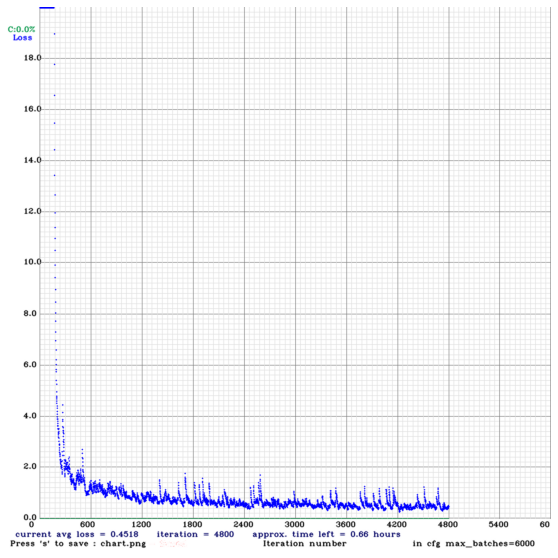

In [6]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
imShow('chart.png')

In [9]:
%cd '/content/drive/MyDrive/Yolo'

/content/drive/MyDrive/Yolo


In [13]:
img_path = "/content/0.jpg"
!darknet/darknet detector test custom_data/labelled_data.data /content/yolov3_custom.cfg backup/yolov3_custom_4000.weights {img_path} -dont_show

/bin/bash: darknet/darknet: Permission denied
